# Hamiltonian Monte Carlo (HMC) - exercise 05
 >__Created__:  2018 Harrison B. Prosper

See hmc.ipynb for details of the Hamiltonian Monte Carlo method.

## Exercise
Sample from a 1-D function $f(q)$ using HMC.

In [73]:
import os, sys
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.externals import joblib

import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

In [83]:
# update fonts
FONTSIZE = 24
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 24}

mp.rc('font', **font)

### Function from which to sample

In [3]:
def function(q):
    p = 0.5*st.norm.pdf(q, 2.0, 0.7)+0.3*st.norm.pdf(q, 3.0, 0.2)+ 0.2*st.norm.pdf(q, 5.0, 0.5)
    return p

def U(q):
    return -np.log(function(q)+1e-25)

### Plot it

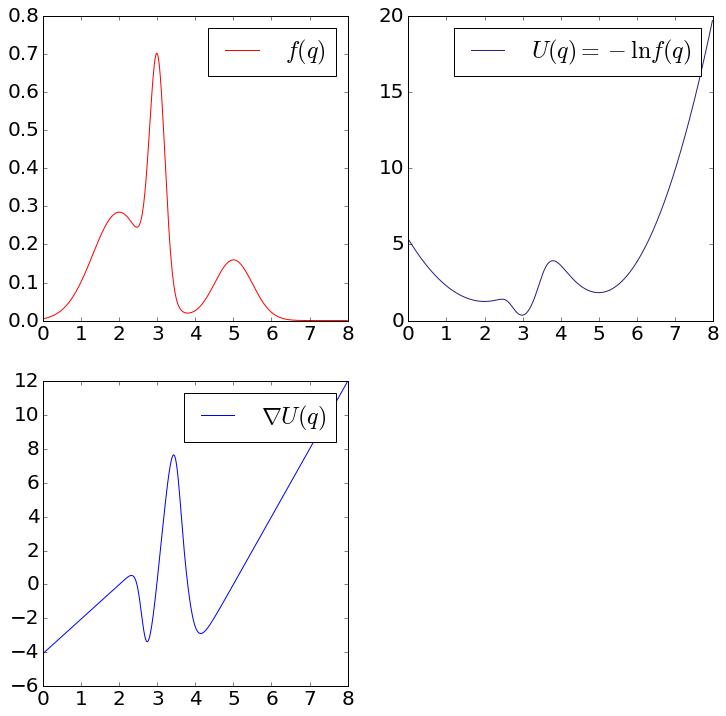

In [4]:
q = np.arange(0, 8, 0.01)
f = function(q)
u = U(q)
g = grad(U, q)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221); ax1.plot(q, f, color=(1,0,0), label=r'$f(q)$')
plt.legend()

ax2 = fig.add_subplot(222); ax2.plot(q, u, color=(0.2,0.1,0.5), label=r'$U(q) = -\ln f(q)$'); 
plt.legend()

ax3 = fig.add_subplot(223); ax3.plot(q, g, color=(0,0,1), label = r'$\mathbf{\nabla}U(q)$')
plt.legend()

plt.show()


### Run HMC

In [69]:
%run hmc.ipynb
N = 5000  # number of iterations
x = []
q0= 1.0 # initial position
a = 0.0 # number of accepted moves

def runHMC(N, x, q0):
    a = 0.0
    for i in range(N):
        q, accept = next_point(U, q0)
        if accept:
            x.append(q)
            a += 1.0
            f = a / (i+1)
        if i % 500 == 0: 
            print "iteration: %10d, accepted moves: %10.0f, fraction: %10.5f" % (i, a, f),q
        q0 = q
    return q

In [10]:
q = runHMC(N, x, q0)
joblib.dump(x, "x5000.pkl")

In [70]:
q0 = q
q  = runHMC(N, x, q0)

iteration:          0, accepted moves:          1, fraction:    1.00000 5.94853315561
iteration:        500, accepted moves:        501, fraction:    1.00000 3.21001262792
iteration:       1000, accepted moves:       1001, fraction:    1.00000 3.06985084828
iteration:       1500, accepted moves:       1501, fraction:    1.00000 1.28839057011
iteration:       2000, accepted moves:       2001, fraction:    1.00000 2.30085039787
iteration:       2500, accepted moves:       2501, fraction:    1.00000 2.41140188891
iteration:       3000, accepted moves:       3001, fraction:    1.00000 2.60697080108
iteration:       3500, accepted moves:       3501, fraction:    1.00000 2.9086609131
iteration:       4000, accepted moves:       4001, fraction:    1.00000 3.18233284032
iteration:       4500, accepted moves:       4500, fraction:    0.99978 2.92504452558


In [90]:
def plotDistribution(g, f, ftsize=FONTSIZE, fgsize=(12, 6)):
    # set size of figure
    plt.figure(figsize=fgsize)
    
    # plot signals probs.
    y, q, a = plt.hist(g, 
             bins=100, 
             color=(1,0,0),
             alpha=0.3,
             range=(0.0,10.0), 
             normed=True, 
             label=r'HMC')
    pl.legend() # show legend using specified "label"
    
    # add error bars
    h     = 0.5*(q[1]-q[0])
    gsum  = sum(g)
    area  = gsum * h
    yerr  = np.sqrt(y)/np.sqrt(area)
    q     = q + h; q = q[:-1]
    plt.errorbar(q, y, yerr=yerr, fmt='o')

    x = np.arange(0, 8, 0.01)
    y = f(x)
    plt.plot(x, y, label='$f(q)$')
    pl.legend()
    
    # adjust y limits
    axes = plt.gca()
    ymin, ymax = axes.get_ylim()
    delta = 0.2
    ii = int(1.3*ymax/delta)
    ymax = ii * 0.2
    axes.set_ylim((0, ymax))
    plt.savefig("05_hmc.png")
    plt.show()

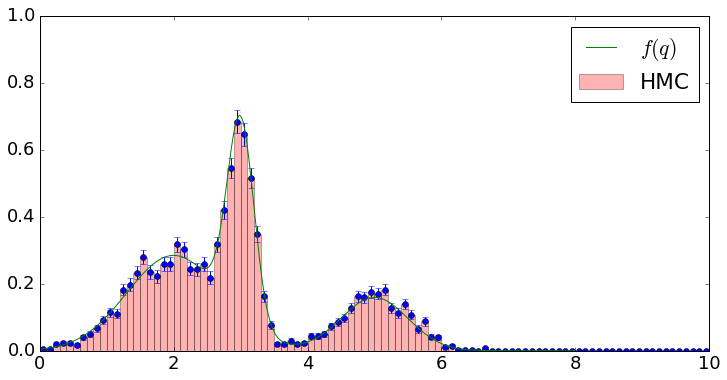

['x10000.pkl']

In [91]:
# update fonts
FONTSIZE = 18
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

mp.rc('font', **font)
burnin = 1000
plotDistribution(x[burnin:], function)
joblib.dump(x, "x10000.pkl")